In [1]:
# The update Model 0717

In [2]:
# -*-coding:utf-8-*-
import re
import numpy as np
import pickle

def choose_file():
    print ('Which one?')
    location = input()
    print ('neg/pos?')
    polarity =  input()
    return (location, polarity)

def read_withoutstopwords(x):
    
    global location, polarity
    
    # Preparation:
    read_sentidict = open('sentidict.pkl','rb')
    sentidict = pickle.load(read_sentidict)
    read_sentidict.close()

    sentiList = list(sentidict.keys())
    
    # First Step: Read Content
    with open('.\ChnSentiCorp\%s\%s\withoutstop\%s(%d).txt'%(location,polarity,polarity,x),encoding='utf-8-sig') as f:
        content = f.read()
        content = re.sub('[A-Za-z0-9\[\`\~\!\@\#\$\^\&\*\(\)\=\|\{\}\'\'\[\]\<\>\/\~\@\#\\\&\*\%\“\"\”\、\(\)\（\）\《\》]', '', content)
        
    # Second Step: Save punctuation and Deal with the tricky ones
    pattern = re.compile(r'；|，|\！|\。|\：|\？|\?|\.|\,|\!|\;|\:')
    result = pattern.findall(content)
    
    save_index = []
    for i in range(len(result)):
        if result[i] == '!' or result[i] == '！':
            save_index.append(i)
        if result[i] == '?' or result[i] == '？':
            save_index.append(i)
        if result[i] == '.' or result[i] == '。':
            save_index.append(i)
            
    drop_index = []
    for i in range(len(save_index)):
        if result[save_index[i-1]] == result[save_index[i]]:
            drop_index.append(save_index[i])
        else: pass
        
    for i in drop_index:
        result[i] = ' '
    
    result = [i for i in result if i != ' ']
    
    # Third Step: Split the content and Clean the data
    content = re.split(r'；|，|\！|\。|\：|\？|\?|\.|\,|\!|\;|\:', content)
    for i in content:
        if i == ' ':content.remove(i)
        
    # Fourth Step: Change its' format
    for i in range(len(content)):
        content[i] = [x for x in content[i].split(' ') if x !='']
    content = [x for x in content if x!=[]]
    
    # Fifth Step: Build up the Zero Model Matrix
    np_content = np.full((len(content),3),0)
    
    # Sixth Step: Temp Matrix and Fix the first column of our Model Matrix
    data_width = []
    max_width = 0
    for i in range(len(content)):
        for j in range(len(content[i])):
            data_width.append(j)
    
    try:max_width = max(data_width)+1
    except ValueError as e:print ('ValueError in postion'+str(x))
            
    content_matrix =  np.full((len(content),max_width),0)
    
    for i in range(len(content)):
        for j in range(len(content[i])):
            if content[i][j] in sentiList:
                content_matrix[i][j] = sentidict[content[i][j]]
    
    np_content[:,0] = content_matrix.sum(axis=1)
    
    # Seventh Step: Fix the second column of our Model Matrix
    with open('Negation.txt') as f_N:
        sentiList_Neg = f_N.read().split('\n')
    temp = content_matrix.sum(axis=1)
    
    for i in range(len(temp)):
        if temp[i] == 0 or temp[i] == -1:pass
        else: temp[i] = 1
        
    np_content[:,1] = temp
    
    # Eighth Step: Fix the third column of our Model Matrix
    np_pun = np.zeros(len(content))
    try:
        punctuation = ['！','!']
        for i in range(len(result)):
            if result[i] in punctuation:
                np_pun[i] = 1
    except IndexError as e:print ('IndexError in postion'+str(x))
    
    try:
        punctuation = ['？','?']
        for i in range(len(result)):
            if result[i] in punctuation:
                np_pun[i] = -1
    except IndexError as e:print ('IndexError in postion'+str(x))
            
    np_content[:,2] = np_pun
    
    # Ninth Step: Multiply Weight1
    with open('Turn.txt') as f_T:
        turnWords = f_T.read().split('\n')
    
    data_width = []
    max_width = 0
    for i in range(len(content)):
        for j in range(len(content[i])):
            data_width.append(j)
    
    try:max_width = max(data_width)+1
    except ValueError as e:print ('ValueError in postion'+str(x))
            
    content_matrix =  np.full((len(content),max_width),0)

    for i in range(len(content)):
        for j in range(len(content[i])):
            if content[i][j] in turnWords:
                content_matrix[i][j] = -1
                
    content_matrix_sum = content_matrix.sum(axis=1)
    
    for i in range(len(content_matrix_sum)):
        if content_matrix_sum[i] == 0:content_matrix_sum[i] = 1
            
    for i in range(len(content_matrix_sum)):
        np_content[i] = np_content[i]*content_matrix_sum[i]
        
    # Tenth Step: Multiply Weight2
    read_dict_level = open('dict_level.pkl','rb')
    dict_level = pickle.load(read_dict_level)
    read_dict_level.close()
    
    dict_level_list = list(dict_level)
    
    data_width = []
    max_width = 0
    for i in range(len(content)):
        for j in range(len(content[i])):
            data_width.append(j)
    
    try:max_width = max(data_width)+1
    except ValueError as e:print ('ValueError in postion'+str(x))
            
    content_matrix =  np.full((len(content),max_width),0)

    for i in range(len(content)):
        for j in range(len(content[i])):
            if content[i][j] in dict_level_list:content_matrix[i][j] = dict_level[(content[i][j])]
                
    weight = (1+content_matrix.sum(axis=1))/(len(content)+content_matrix.sum())
    
    np_content = np_content.astype(float)
    
    for i in range(len(weight)):
        np_content[i] = np_content[i]*weight[i]
        
    result_matrix = []
    for i in range(len(np_content)):
        result_matrix.extend(np_content[i])
        
    return result_matrix

In [ ]:
# Test_1

In [24]:
location, polarity = choose_file()
result_matrix = read_withoutstopwords(999)
result_matrix

Which one?
Dangdang_Book_4000
neg/pos?
neg


[-0.20833333333333334,
 -0.20833333333333334,
 0.0,
 0.25,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.041666666666666664,
 -0.75,
 0.375,
 0.375,
 0.0,
 0.0,
 0.041666666666666664,
 -0.041666666666666664,
 -0.041666666666666664,
 0.041666666666666664]

In [25]:
location, polarity = choose_file()
result_matrix = read_withoutstopwords(999)
result_matrix

Which one?
Ctrip_htl_ba_4000
neg/pos?
neg


[-0.6,
 -0.6,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.06666666666666667,
 -0.06666666666666667,
 0.0,
 0.0,
 0.0,
 0.0]

In [26]:
location, polarity = choose_file()
result_matrix = read_withoutstopwords(999)
result_matrix

Which one?
Jingdong_NB_4000
neg/pos?
neg


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.03571428571428571,
 -0.03571428571428571,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.07142857142857142,
 0.03571428571428571,
 0.0,
 0.17857142857142858,
 0.17857142857142858,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
# Test_2

In [3]:
def get_temp(n):
    global location, polarity
    temp = []
    location, polarity = choose_file()
    for i in range(n):
        temp.append(read_withoutstopwords(i))
    return (temp)
    
def combine_neg_pos_data(n):
    temp1 = get_temp(n)
    temp2 = get_temp(n)
    data = temp1 + temp2
  
    len_list = []
    for i in data:
        len_list.append(len(i))
    max_len = max(len_list)
    
    for i in data:
        if len(i) != max_len:
            i.extend([0]*(max_len-len(i)))
        
    data = np.array(data)
    return data

In [15]:
data = combine_neg_pos_data(2)

Which one?
Jingdong_NB_4000
neg/pos?
neg
Which one?
Jingdong_NB_4000
neg/pos?
pos


In [16]:
data

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.33333333,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.45454545,  0.45454545,  0.        ,  0.        ,  0.        ,
         0.        , -0.09090909, -0.09090909, -0.09090909,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.     

In [ ]:
# Test_3

In [4]:
data1 = combine_neg_pos_data(2000)

Which one?
Ctrip_htl_ba_4000
neg/pos?
neg
Which one?
Ctrip_htl_ba_4000
neg/pos?
pos


In [5]:
data1

array([[-0.22727273, -0.22727273,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.35294118, -0.35294118,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4516129 ,  0.22580645,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35714286,  0.35714286,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09090909,  0.09090909,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [90]:
len(data1)

4000

In [91]:
len(data1[0])

561

In [92]:
neg_data = data1[:2000]
pos_data = data1[2000:]

In [93]:
train_data =  np.vstack((neg_data[:1400], pos_data[:1400]))
test_data = np.vstack((neg_data[1400:], pos_data[1400:]))

In [94]:
len(train_data)

2800

In [95]:
len(test_data)

1200

In [96]:
train_labels = [0]*1400 + [1]*1400

In [97]:
test_labels = [0]*600 + [1]*600

In [33]:
from sklearn import svm 

clf = svm.SVC(kernel = 'linear') #SVM模块，svc,线性核函数 
clf.fit(train_data, train_labels) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
from sklearn.metrics import accuracy_score

predict_test = clf.predict(test_data)
accuracy_score(test_labels, predict_test)

0.7366666666666667

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, predict_test)

array([[485, 115],
       [201, 399]])

In [41]:
from sklearn.metrics import classification_report

target_names = ['1', '0']
print (classification_report(test_labels, predict_test, target_names=target_names))

             precision    recall  f1-score   support

          1       0.71      0.81      0.75       600
          0       0.78      0.67      0.72       600

avg / total       0.74      0.74      0.74      1200



In [42]:
from sklearn import metrics

In [43]:
metrics.precision_score(test_labels, predict_test)

0.7762645914396887

In [44]:
metrics.recall_score(test_labels, predict_test)

0.665

In [45]:
metrics.f1_score(test_labels, predict_test) 

0.7163375224416517

In [212]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()#这里使用了默认的参数设置
rf.fit(train_data, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [213]:
predict_test = rf.predict(test_data)

In [214]:
for i in range(len(predict_test)): 
    if predict_test[i] <= 0.5:
        predict_test[i] = 0

In [215]:
for i in range(len(predict_test)): 
    if predict_test[i] != 0:
        predict_test[i] = 1

In [216]:
predict_test

array([0., 0., 0., ..., 1., 1., 1.])

In [217]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, predict_test)

0.87

In [218]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, predict_test)

array([[582,  18],
       [138, 462]])

In [219]:
from sklearn.metrics import classification_report

target_names = ['1', '0']
print (classification_report(test_labels, predict_test, target_names=target_names))

             precision    recall  f1-score   support

          1       0.81      0.97      0.88       600
          0       0.96      0.77      0.86       600

avg / total       0.89      0.87      0.87      1200



In [220]:
from sklearn import metrics

In [221]:
metrics.precision_score(test_labels, predict_test)

0.9625

In [222]:
metrics.recall_score(test_labels, predict_test)

0.77

In [223]:
metrics.f1_score(test_labels, predict_test) 

0.8555555555555556

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [200]:
model = Sequential()
model.add(Dense(64, input_dim=96, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(train_data, train_labels,
          epochs=10, batch_size=5,shuffle=True, validation_split=0.1,verbose=1)
score = model.evaluate(test_data, test_labels, batch_size=5)

Train on 2520 samples, validate on 280 samples
Epoch 1/10
2520/2520 [==============================] - 1s 399us/step - loss: 0.6458 - acc: 0.6345 - val_loss: 0.7432 - val_acc: 0.6214
Epoch 2/10
2520/2520 [==============================] - 0s 139us/step - loss: 0.6126 - acc: 0.6996 - val_loss: 0.6707 - val_acc: 0.7107
Epoch 3/10
2520/2520 [==============================] - 0s 137us/step - loss: 0.6137 - acc: 0.7091 - val_loss: 0.7222 - val_acc: 0.6643
Epoch 4/10
2520/2520 [==============================] - 0s 137us/step - loss: 0.6116 - acc: 0.7190 - val_loss: 0.6676 - val_acc: 0.6750
Epoch 5/10
2520/2520 [==============================] - 0s 137us/step - loss: 0.6103 - acc: 0.7190 - val_loss: 0.7127 - val_acc: 0.6607
Epoch 6/10
2520/2520 [==============================] - 0s 137us/step - loss: 0.6235 - acc: 0.7194 - val_loss: 0.7522 - val_acc: 0.6393
Epoch 7/10
2520/2520 [==============================] - 0s 137us/step - loss: 0.6168 - acc: 0.7230 - val_loss: 0.7219 - val_acc: 0.6393
E

In [201]:
#评估模型
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6120954566945632
Test accuracy: 0.7208333447575569


In [202]:
predict_test = model.predict_classes(test_data)

In [203]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, predict_test)

0.7208333333333333

In [204]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, predict_test)

array([[488, 112],
       [223, 377]])

In [205]:
from sklearn.metrics import classification_report

target_names = ['1', '0']
print (classification_report(test_labels, predict_test, target_names=target_names))

             precision    recall  f1-score   support

          1       0.69      0.81      0.74       600
          0       0.77      0.63      0.69       600

avg / total       0.73      0.72      0.72      1200



In [206]:
from sklearn import metrics

In [207]:
metrics.precision_score(test_labels, predict_test)

0.7709611451942741

In [208]:
metrics.recall_score(test_labels, predict_test)

0.6283333333333333

In [209]:
metrics.f1_score(test_labels, predict_test) 

0.6923783287419651

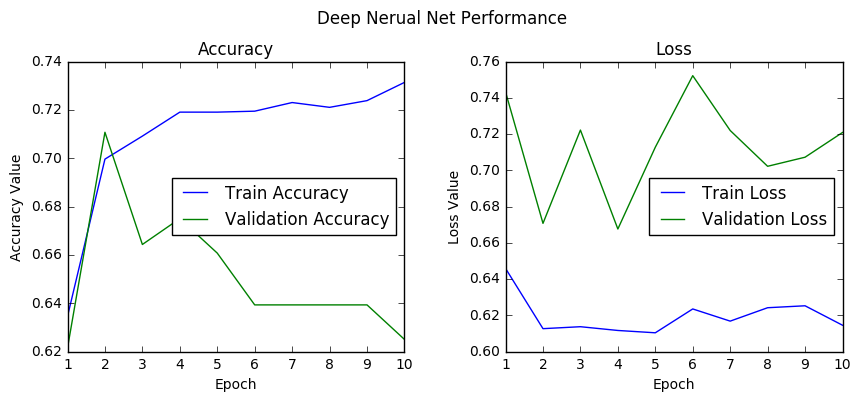

In [210]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Deep Nerual Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1, 11))
ax1.plot(epochs, history.history['acc'], label = 'Train Accuracy')
ax1.plot(epochs, history.history['val_acc'], label = 'Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = 'best')

ax2.plot(epochs, history.history['loss'], label = 'Train Loss')
ax2.plot(epochs, history.history['val_loss'], label = 'Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc = 'best')

plt.show()

In [136]:
data2 = combine_neg_pos_data(2000)

Which one?
Dangdang_Book_4000
neg/pos?
neg
IndexError in postion1373
Which one?
Dangdang_Book_4000
neg/pos?
pos
IndexError in postion720


In [137]:
data2

array([[ 0.07692308,  0.03846154,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.20833333, -0.20833333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53846154,  0.53846154,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.04166667,  0.04166667,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.02702703, -0.02702703,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [138]:
len(data2)

4000

In [139]:
len(data2[0])

129

In [211]:
neg_data = data2[:2000]
pos_data = data2[2000:]
train_data =  np.vstack((neg_data[:1400], pos_data[:1400]))
test_data = np.vstack((neg_data[1400:], pos_data[1400:]))
train_labels = [0]*1400 + [1]*1400
test_labels = [0]*600 + [1]*600

In [179]:
from sklearn import svm 

clf = svm.SVC(kernel = 'linear') #SVM模块，svc,线性核函数 
clf.fit(train_data, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [180]:
from sklearn.metrics import accuracy_score

predict_test = clf.predict(test_data)
accuracy_score(test_labels, predict_test)

0.7141666666666666

In [181]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, predict_test)

array([[423, 177],
       [166, 434]])

In [182]:
from sklearn.metrics import classification_report

target_names = ['1', '0']
print (classification_report(test_labels, predict_test, target_names=target_names))

             precision    recall  f1-score   support

          1       0.72      0.70      0.71       600
          0       0.71      0.72      0.72       600

avg / total       0.71      0.71      0.71      1200



In [183]:
from sklearn import metrics

In [184]:
metrics.precision_score(test_labels, predict_test)

0.7103109656301145

In [185]:
metrics.recall_score(test_labels, predict_test)

0.7233333333333334

In [186]:
metrics.f1_score(test_labels, predict_test) 

0.7167630057803469

In [173]:
data3 = combine_neg_pos_data(2000)

Which one?
Jingdong_NB_4000
neg/pos?
neg
Which one?
Jingdong_NB_4000
neg/pos?
pos


In [174]:
data3

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45454545,  0.45454545,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.35714286, -0.35714286,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.11111111,  0.11111111,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16666667,  0.08333333,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14285714,  0.07142857,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [175]:
len(data3)

4000

In [177]:
len(data3[0])

96

In [178]:
neg_data = data3[:2000]
pos_data = data3[2000:]
train_data =  np.vstack((neg_data[:1400], pos_data[:1400]))
test_data = np.vstack((neg_data[1400:], pos_data[1400:]))
train_labels = [0]*1400 + [1]*1400
test_labels = [0]*600 + [1]*600